## Find Spike Rate
### Problem 0.1: Non-leaky, input varies slowly compared to spike rate 

$\dot{u}(t) = I$

$u(t) = It$

$u_{max} = \frac{I}{r}$

$r = \frac{I}{u_{max}}$

Conclusion: Rate scales linearly with input, as expected

### Problem 0.2: Non-leaky, input variability comparable with spike rate

$\dot{u}(t) = I(t)$

$u(t_{i+1}) = \int_0^{t_{i+1} - t_i}I(t + t_i)dt = F(t_{i+1} - t_i, t_i)$

$r_{i+1} = \frac{1}{F^{-1}(u_{max}, t_i)}$

Conclusion: Spike rate defined via immediate inter-spike interval varies with every spike, and depends strongly on when the spike happens. This is not the quantity we are after

### Problem 0.3: Leaky, slow input

Now assume leaky neurons

$\dot{u} = -\frac{u}{\tau} + I$

$\frac{d}{dt}\bigl(e^{t/\tau}u \bigr) = Ie^{t/\tau}$

$u = Ce^{-t/\tau} + I \tau$

$u = I \tau (1 - e^{-t/\tau})$

$u_{max} = I(t) \tau (1 - e^{-1/r(t)\tau})$

$r(t)\tau = \Theta ( I \tau - u_{max} )  \log \biggl(\frac{I\tau}{I\tau - u_{max}} \biggr)^{-1}$

$r(t)\tau \approx \frac{I \tau}{u_{max}}$

Problem here is that the equation is ill-posed in case $u_{max} > I\tau$, since spiking is impossible. One solution is to consider a more realistic neuron with additional gaussian noisy input of variance $\sigma^2$. Then the neuron always has a chance to spike.

### Problem 0.4: Non-leaky, slow input, noisy

$\dot{u}(t) = I + N(t)$

where $\xi(b-a) = \int_a^b N(t)dt \sim \mathcal{N}(0, \sigma^2 (b-a))$

$u_{max} = It + \xi(t) = It + \xi_0 \sqrt{t}$

$P[\xi_0 > \frac{u_{max} -It}{\sqrt{t}}] = erfc^{-1}(\frac{u_{max} -It}{\sqrt{t}})$

Ok, so we know the probability that the threshold is crossed at any moment in time. Now, how do we find the expected time at which the threshold was crossed the first time?

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


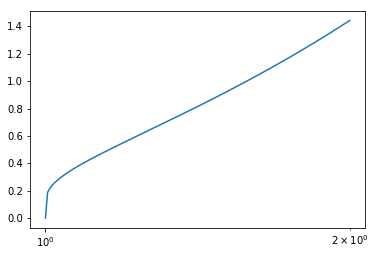

In [4]:
import numpy as np
import matplotlib.pyplot as plt

I = np.linspace(1,2,200)
r = 1 / np.log(I / (I - 1))

plt.figure()
plt.semilogx(I, r)
plt.show()



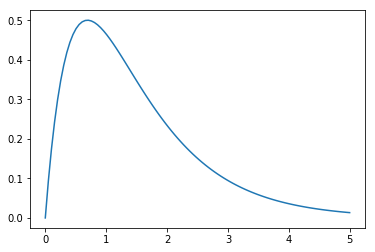

In [11]:
def h(t,tau1, tau2):
    return (np.exp(-t/tau1) - np.exp(-t/tau2))/(tau1-tau2)

plt.figure()
t = np.linspace(0,5,100)
plt.plot(t, h(t,1,0.5))
plt.show()
